In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

- https://www.kaggle.com/c/expedia-hotel-recommendations


Column name	Description	Data type
date_time	Timestamp	string
site_name	ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...)	int
posa_continent	ID of continent associated with site_name	int
user_location_country	The ID of the country the customer is located	int
user_location_region	The ID of the region the customer is located	int
user_location_city	The ID of the city the customer is located	int
orig_destination_distance	Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated	double
user_id	ID of user	int
is_mobile	1 when a user connected from a mobile device, 0 otherwise	tinyint
is_package	1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise	int
channel	ID of a marketing channel	int
srch_ci	Checkin date	string
srch_co	Checkout date	string
srch_adults_cnt	The number of adults specified in the hotel room	int
srch_children_cnt	The number of (extra occupancy) children specified in the hotel room	int
srch_rm_cnt	The number of hotel rooms specified in the search	int
srch_destination_id	ID of the destination where the hotel search was performed	int
srch_destination_type_id	Type of destination	int
hotel_continent	Hotel continent	int
hotel_country	Hotel country	int
hotel_market	Hotel market	int
is_booking	1 if a booking, 0 if a click	tinyint
cnt	Numer of similar events in the context of the same user session	bigint
hotel_cluster	ID of a hotel cluster	int
destinations.csv

Column name	Description	Data type
srch_destination_id	ID of the destination where the hotel search was performed	int
d1-d149	latent description of search regions	double

- total rows = 37,670,293, total cols = 24

In [13]:
if 0:
    chunksize = 10000000
    filename = 'train.csv'

    total_rows = 0
    for i,df_chunk in enumerate(pd.read_csv(filename, chunksize=chunksize)):
        print(i, df_chunk.shape)
        total_rows += df_chunk.shape[0]
        df_chunk.to_pickle('train_chunk_{}.pickle'.format(str(i)))
        print('total rows {}'.format(str(total_rows)))

0 (10000000, 24)
1 (10000000, 24)
2 (10000000, 24)
3 (7670293, 24)


In [83]:
def check_nan(df):
    n_row = df.shape[0]
    df_nullsum = _get_ratio(df.isnull().sum(), n_row)
    #df_nullsum = pd.DataFrame(, columns = ['abs'])
    #df_nullsum['ratio(%)'] = df_nullsum['abs']/ n_row * 100
    print(df_nullsum[df_nullsum['abs']>0])
    #print(df_nullsum)
    return df_nullsum

def _get_ratio(sr, n_row):
    df = pd.DataFrame(sr, columns=['abs'])
    df['ratio(%)'] = df['abs']/ n_row * 100.0
    return df

In [84]:
df_nullsum = check_nan(df_chunk)

                               abs   ratio(%)
orig_destination_distance  2717073  35.423327
srch_ci                       9789   0.127622
srch_co                       9787   0.127596
                               abs   ratio(%)
date_time                        0   0.000000
site_name                        0   0.000000
posa_continent                   0   0.000000
user_location_country            0   0.000000
user_location_region             0   0.000000
user_location_city               0   0.000000
orig_destination_distance  2717073  35.423327
user_id                          0   0.000000
is_mobile                        0   0.000000
is_package                       0   0.000000
channel                          0   0.000000
srch_ci                       9789   0.127622
srch_co                       9787   0.127596
srch_adults_cnt                  0   0.000000
srch_children_cnt                0   0.000000
srch_rm_cnt                      0   0.000000
srch_destination_id              0

In [80]:
df = df_chunk
n_row = df.shape[0]
sr_unique_value = df[col_name].value_counts()
#df_unique_value

In [82]:
df1 = _get_ratio(sr_unique_value, n_row)
df1

,abs,ratio(%)


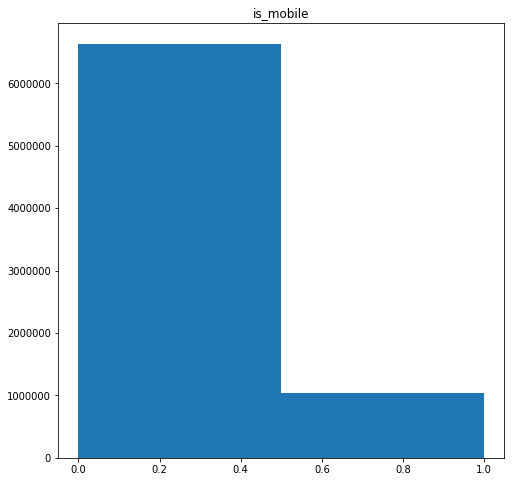

In [66]:
# for categorical data
#['site_name','is_mobile', 'posa_continent','site_name', 'user_location_country','user_location_region', 'user_location_city']
col_name =  'is_mobile' # '
set_yscale_log = False
#df[col_name].hist(bins=100)
plt.figure(figsize=(8,8))
ax = plt.subplot(111) # nrow, ncol, i
n, bins, patches = ax.hist(df[col_name],bins=min(100))
ax.set_title(col_name)
if set_yscale_log:
    ax.set_yscale("log")

AttributeError: 'Series' object has no attribute 'columns'

In [19]:
a = df_isnull.sum() 

orig_destination_distance    2717073
srch_ci                         9789
srch_co                         9787
dtype: int64

In [13]:
df_test = pd.read_csv('test.csv', nrows=500)
print(df_test.shape,df_test.columns.values)
#df_test.head(10)

(500, 22) ['id' 'date_time' 'site_name' 'posa_continent' 'user_location_country'
 'user_location_region' 'user_location_city' 'orig_destination_distance'
 'user_id' 'is_mobile' 'is_package' 'channel' 'srch_ci' 'srch_co'
 'srch_adults_cnt' 'srch_children_cnt' 'srch_rm_cnt' 'srch_destination_id'
 'srch_destination_type_id' 'hotel_continent' 'hotel_country'
 'hotel_market']


In [3]:
if 0:
    df.to_pickle('train.pickle')
df = pd.read_pickle('train.pickle')

### Missing values

In [4]:
a = df.isnull().sum()
a
# orig_destination_distance  0.3598894 missing value, srch_ci 0.0012198%. srch_co 6099

date_time                          0
site_name                          0
posa_continent                     0
user_location_country              0
user_location_region               0
user_location_city                 0
orig_destination_distance    1799447
user_id                            0
is_mobile                          0
is_package                         0
channel                            0
srch_ci                         6099
srch_co                         6099
srch_adults_cnt                    0
srch_children_cnt                  0
srch_rm_cnt                        0
srch_destination_id                0
srch_destination_type_id           0
is_booking                         0
cnt                                0
hotel_continent                    0
hotel_country                      0
hotel_market                       0
hotel_cluster                      0
dtype: int64

In [22]:
df[df['orig_destination_distance'] <0.1 ].count() 

date_time                    1373
site_name                    1373
posa_continent               1373
user_location_country        1373
user_location_region         1373
user_location_city           1373
orig_destination_distance    1373
user_id                      1373
is_mobile                    1373
is_package                   1373
channel                      1373
srch_ci                      1368
srch_co                      1368
srch_adults_cnt              1373
srch_children_cnt            1373
srch_rm_cnt                  1373
srch_destination_id          1373
srch_destination_type_id     1373
is_booking                   1373
cnt                          1373
hotel_continent              1373
hotel_country                1373
hotel_market                 1373
hotel_cluster                1373
dtype: int64

In [44]:
id1 = df[df['is_booking']==1]
id1.count()

date_time                    401443
site_name                    401443
posa_continent               401443
user_location_country        401443
user_location_region         401443
user_location_city           401443
orig_destination_distance    266368
user_id                      401443
is_mobile                    401443
is_package                   401443
channel                      401443
srch_ci                      401443
srch_co                      401443
srch_adults_cnt              401443
srch_children_cnt            401443
srch_rm_cnt                  401443
srch_destination_id          401443
srch_destination_type_id     401443
is_booking                   401443
cnt                          401443
hotel_continent              401443
hotel_country                401443
hotel_market                 401443
hotel_cluster                401443
dtype: int64

In [46]:
idd = id1['orig_destination_distance'].apply(np.isnan) 

In [1]:
sum(idd) / (1.0*idd.shape[0])

NameError: name 'idd' is not defined

In [75]:
a.values / (1.0*df.shape[0])

array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.3598894,  0.       ,  0.       ,  0.       ,
        0.       ,  0.0012198,  0.0012198,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ])

### Sample data

In [7]:
df_sa = df.sample(n=100000,random_state=10).sort_index()
df_sa.shape
n_row = df_sa.shape[0]
n_col = df_sa.shape[1]

date_time                          0
site_name                          0
posa_continent                     0
user_location_country              one country dominant 
user_location_region               0
user_location_city                 0
orig_destination_distance    1799447
user_id                            unique value 90
is_mobile                          0
is_package                         0
channel                            0
srch_ci                         6099
srch_co                         6099
srch_adults_cnt                    0
srch_children_cnt                  0
srch_rm_cnt                        0
srch_destination_id                0
srch_destination_type_id           0
is_booking                         0
cnt                                0
hotel_continent                    0
hotel_country                      0
hotel_market                       0
hotel_cluster     

In [10]:
df.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


(159850,) 1.5985 31.2793243666 [530 495 471 467 456 451 448 448 446 438] [2 2 2 2 2 2 2 2 2]


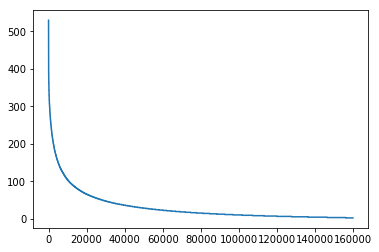

In [9]:
# for categorical data
col_name =  'user_id' # 'is_mobile' 'posa_continent','site_name', 'user_location_country','user_location_region', 'user_location_city'
#df[col_name].hist(bins=100)
plt.figure()
data = df[col_name].value_counts().values
data_mean = np.mean(data)
#fig, axies = plt.subplots(211)
plt.plot(data)
#axies[1]
#plt.boxplot(df_sa[col_name].values)
print(data.shape, data.shape[0]/ (1.0*n_row), data_mean, data[0:10],data[-10:-1])
# user_location_country: only a few 

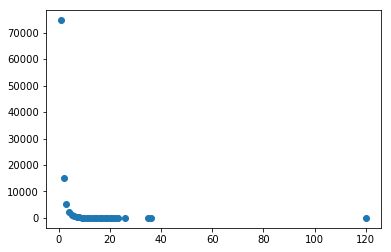

In [145]:
# non-categorical data
col_name =  'cnt' # 'is_mobile' 'posa_continent','site_name', 'user_location_country','user_location_region', 'user_location_city'
plt.figure()
data = df_sa[col_name].value_counts()
#plt.hist(data)
plt.plot(data.index, data.values,'o')

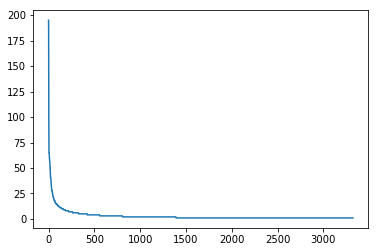